In [33]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from math import *
MaxIterations = 10000

In [34]:
def BisectionMethod(f,A, B, TOL, N = MaxIterations):
    
    a = copy.copy(A)
    b = copy.copy(B)

    print("\n\n***** BISECTION METHOD *****")
    i = 1
    
    accuracy = []

    while i<=N:
        
        # Finding Bisection
        m = (a+b)/2
        
        # Finding Function Value at a b and m
        fa = f(a)
        fm = f(m)
        fb = f(b)
        
        print(f'iteration = {i:3}  a = {a:.15f}  b = {b:.15f}  m = {m:.15f}  f(m) = {fm:.15f}')
        
        
        if abs(fm) <=TOL or (abs(m-a)) < TOL:
            print(f'\nFinal Root Found')
            
            print(f'\niteration = {i:3}    a = {a:3.06f}   b = {b:3.06f}   m = {m:3.06f}   f(m) = {fm:3.06f}\n\n')
           
            # print(f'Iteration-{i}, m = {m:3.10} and f(x2) = {fm:3.10}')
            
            break
        acc =[]
        acc.append(i)
        i = i + 1

        accuracyReached = 0
        
        # Checking Interval for next iteration
        if fa*fm>0:
            accuracyReached = abs(a-m)
            a = m
        else:
            accuracyReached = abs(b-m)
            b = m
        
        acc.append(accuracyReached)
        accuracy.append(acc)

    if i > N:
        print("Not Convergent")        
    return accuracy  

In [35]:
def FalsePosition(f, a ,b ,e ,N=MaxIterations):

    x0 = copy.copy(a)
    x1 = copy.copy(b)

    print('\n\n*** FALSE POSITION METHOD IMPLEMENTATION ***')
    if f(x0) * f(x1) > 0.0:
        print('Given guess values do not bracket the root.')
        print('Try Again with different guess values.')
        return 0
    else:
        accuracy = []
        
        step = 1
        
        while step <= N :
            
            # x2 = (x0*f(x1) - x1*f(x0))/( f(x1) - f(x0) )      # Both formula's are same 
            x2 = x1 - (f(x1)*(x1-x0))/(f(x1) - f(x0))
            

            print(f'Iteration-{step:3}, x0 = {x0:.15f}  x1 = {x1:.15f}  x2 = {x2:.15f} and f(x2) = {f(x2):.15f}')
           

            if(abs(x2-x1)<e or f(x2) <e):
                print(f'\nRequired root is: {x2:3.06f}')
                break
            
            accuracyReached = 0

            if f(x0) * f(x2) < 0:
                accuracyReached = abs(x1-x2)
                x1 = x2
            else:
                accuracyReached = abs(x0-x2)
                x0 = x2
            
            acc =[]
            acc.append(step)
            acc.append(accuracyReached)
            accuracy.append(acc)

            step = step + 1
            
        if step > N:
            print('Not Convergent!')

        return accuracy

In [36]:
def SecantMethod(f, a, b, e, N=MaxIterations):
    
    x0 = copy.copy(a)
    x1 = copy.copy(b)
    
    print('\n\n*** SECANT METHOD IMPLEMENTATION ***')
    
    accuracy = []
    
    step = 1

    while step <= N:
        if f(x0) == f(x1):
            print('Divide by zero error!') 
            break
        
        
        x2 = x1 - (x1-x0)*f(x1)/( f(x1) - f(x0) ) 
        
        accuracyReached = abs(x2-x1)

        acc = []
        acc.append(step)
        acc.append(accuracyReached)
        accuracy.append(acc)

        if(accuracyReached<e):
            print(f'\nRequired root is: {x1:3.06f}')
            break

        print(f'Iteration-{step:3}, a = {x0:.15f}   b ={x1:.15f}  c = {x2:.15f}  f(x2) = {f(x2):.15f}')
        
        x0 = x1
        x1 = x2
        step = step + 1
    
    if(step > N):
        print('\nNot Convergent.')   
    return accuracy

In [37]:
def NewtonRaphson(f, f1, a, e, N=MaxIterations):

    x0 = copy.copy(a)
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    
    accuracy = []

    step = 1

    while step <= N:
        if f1(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/f1(x0)
        
        print(f'Iteration = {step:3}, x0 = {x0:.15f} x1 = {x1:.15f}   f(x1) = {f(x1):.15f} ')
        accuracyReached = abs(x1-x0)
        acc=[]
        acc.append(step)
        acc.append(accuracyReached)
        accuracy.append(acc)

        if(accuracyReached <e):
            print(f'\nRequired root is: {x1:3.06f}')
            break
        x0 = x1
        step = step + 1
        
    if step > MaxIterations:
        print('\nNot Convergent.')
    return accuracy

In [38]:
def fixedPointIteration(f, g, a, e, N = MaxIterations):
    
    x0 = copy.copy(a)
    print('\n\n*** FIXED POINT ITERATION METHOD ***')
    
    accuracy = []

    step = 1
    
    while step <= N:
        
        x1 = g(x0)

        accuracyReached = abs(x1-x0)
        
        acc=[]
        acc.append(step)
        acc.append(accuracyReached)
        accuracy.append(acc)
        
        print(f'Iteration = {step:3}, x0 = {x0:.15f}  x1 = {x1:.15f}   f(x1) = {f(x1):.15f} ')
                        
        if accuracyReached < e:
            print(f'\nRequired root is: {x1:3.15}')
            break

        step = step + 1
        x0=x1
    
    if(step > N):
        print('\nNot Convergent.')
    return accuracy

In [39]:
def h(f, f1,x):
    return f(x)/f1(x)
def g(f, f1, f2, x):
    return (((f1(x))**2)-(f(x))*f2(x))/((f1(x))**2)

def modifiedNewtonRaphson(f,f1,f2, a,e,N=MaxIterations):

    x0 = copy.copy(a)

    print('\n\n*** MODIFIED NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    
    accuracy = []
    
    step = 1

    while step <= N:
        if g(f, f1, f2, x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - h(f, f1,x0)/g(f, f1, f2, x0)
        
        accuracyReached = abs(x1-x0)
        
        acc = [step,accuracyReached]
        accuracy.append(acc)
        
        print(f'Iteration = {step:3}, x0 = {x0:.15f}   x1 = {x1:.15f}   f(x1) = {f(x1):.15f} ')
        
        if(accuracyReached<e):
            print(f'\nRequired root is: {x1:3.06}')
            break
        x0 = x1
        step = step + 1
        
    if step > MaxIterations:
        print('\nNot Convergent.')
    return accuracy

In [40]:
def Muller(f, p, q, r, TOL, N = MaxIterations): 

    x0 = copy.copy(p)
    x1 = copy.copy(q)
    x2 = copy.copy(r)
    
    print("\n\n*** MULLER METHOD IMPLEMENTATION ***")
    
    accuracy = []
    
    h1 = x1 - x0  
    h2 = x2 - x1 
    
    f0 = f(x0) 
    f1 = f(x1) 
    f2 = f(x2) 
    
    d1 = (f1 - f0)/h1  
    d2 = (f2 - f1)/h2 
    d = (d2-d1)/(h1+h2) 
    i = 3
    
    while i<=N: 
        
        b = d2 +h2*d
        D = ((b**2)-4*f2*d)**(1/2)
            
        if(abs(b-D) < abs(b+D)):
            E = b + D 
        else:
            E = b - D

        h = -2*f2/E
        p = x2 + h
        
        if(abs(h)<TOL):
            print(f"Required Root: x = {p:f}")
            break
        
        print(f'\nIteration = {i:3}      p = {p:.15f}          f(p) = {f(p):.15f} ')
        print(f'a = {d:.15f}                b = {b:.15f}              c = {f(x2):.15f}\n')
        
        x0 = x1
        x1 = x2
        x2 = p

        acc =[]
        acc.append(i)
        acc.append(abs(x1-x2))
        accuracy.append(acc)

        h1 = x1 - x0  
        h2 = x2 - x1 

        f0 = f(x0) 
        f1 = f(x1) 
        f2 = f(x2) 
        
        d1 = (f1 - f0)/h1  
        d2 = (f2 - f1)/h2 
        d = (d2-d1)/(h1+h2) 
    
        i += 1 
    if (i > MaxIterations): 
        print("Root cannot be found using, Muller's method") 
    return accuracy

# Input Section

In [41]:
# Defining Function
def f(x):
    q =  cos(x) - x*exp(x)
    return q

def G(x):
    return (acos(x*exp(x)))

# Defining derivative of function
def f1(x):
    return -sin(x) - x*exp(x) - exp(x)

def f2(x):
    return -cos(x) - x*exp(x) - exp(x) - exp(x) 

# Initial Guesses and Acuuracy

In [42]:
x0 = 0.0
x1 = 0.5
x2 = 1.0
e = 0.001


## Bisection Method



***** BISECTION METHOD *****
iteration =   1  a = 0.000000000000000  b = 0.500000000000000  m = 0.250000000000000  f(m) = 0.647906067538709
iteration =   2  a = 0.250000000000000  b = 0.500000000000000  m = 0.375000000000000  f(m) = 0.384885841430489
iteration =   3  a = 0.375000000000000  b = 0.500000000000000  m = 0.437500000000000  f(m) = 0.228200427773503
iteration =   4  a = 0.437500000000000  b = 0.500000000000000  m = 0.468750000000000  f(m) = 0.143073332202635
iteration =   5  a = 0.468750000000000  b = 0.500000000000000  m = 0.484375000000000  f(m) = 0.098747926601167
iteration =   6  a = 0.484375000000000  b = 0.500000000000000  m = 0.492187500000000  f(m) = 0.076136241292489
iteration =   7  a = 0.492187500000000  b = 0.500000000000000  m = 0.496093750000000  f(m) = 0.064717068958731
iteration =   8  a = 0.496093750000000  b = 0.500000000000000  m = 0.498046875000000  f(m) = 0.058979013637925
iteration =   9  a = 0.498046875000000  b = 0.500000000000000  m = 0.499023437500

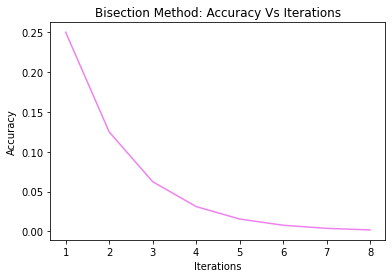

In [43]:
b_acc = BisectionMethod(f,x0,x1,e)
b_i = []
b_a = []
for i in b_acc:
    b_i.append(i[0])
    b_a.append(i[1])
plt.title("Bisection Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(b_i,b_a,color = 'violet')
plt.show()

## False Position Method

In [44]:
f_acc = FalsePosition(f,x0,x1,e)
f_i = []
f_a = []
if f_acc==list():
    for i in f_acc:
        f_i.append(i[0])
        f_a.append(i[1])
    plt.title("False Position Method: Accuracy Vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.plot(f_i,f_a,color = 'indigo')
    plt.show()



*** FALSE POSITION METHOD IMPLEMENTATION ***
Given guess values do not bracket the root.
Try Again with different guess values.


## Secant Method



*** SECANT METHOD IMPLEMENTATION ***
Iteration-  1, a = 0.000000000000000   b =0.500000000000000  c = 0.528106864761784  f(x2) = -0.031758300275517
Iteration-  2, a = 0.500000000000000   b =0.528106864761784  c = 0.517602935973236  f(x2) = 0.000469727453065

Required root is: 0.517603


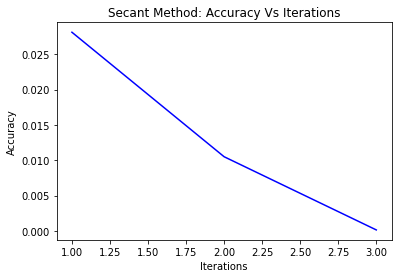

In [45]:
s_acc = SecantMethod(f,x0,x1,e)
s_i = []
s_a = []
for i in s_acc:
    s_i.append(i[0])
    s_a.append(i[1])
plt.title("Secant Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(s_i,s_a,color = 'blue')
plt.show()

## Newton Raphson Method



*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.000000000000000 x1 = 1.000000000000000   f(x1) = -2.177979522590905 
Iteration =   2, x0 = 1.000000000000000 x1 = 0.653079403526177   f(x1) = -0.460642120376870 
Iteration =   3, x0 = 0.653079403526177 x1 = 0.531343367606581   f(x1) = -0.041802734010196 
Iteration =   4, x0 = 0.531343367606581 x1 = 0.517909913135675   f(x1) = -0.000464133587565 
Iteration =   5, x0 = 0.517909913135675 x1 = 0.517757383164834   f(x1) = -0.000000059267797 

Required root is: 0.517757


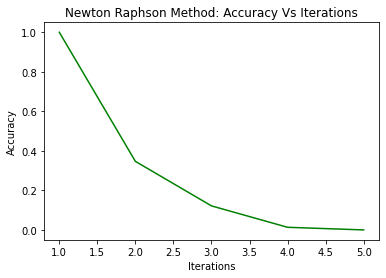

In [46]:
n_acc = NewtonRaphson(f,f1,x0,e)
n_i = []
n_a = []
for i in n_acc:
    n_i.append(i[0])
    n_a.append(i[1])
plt.title("Newton Raphson Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(n_i,n_a,color = 'green')
plt.show()

## Fixed Point Iteration Method

In [47]:
fx_acc = fixedPointIteration(f,G,x0,e)
fx_i = []
fx_a = []
for i in fx_acc:
    fx_i.append(i[0])
    fx_a.append(i[1])
plt.title("Fixed Point Iterations Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(fx_i,fx_a,color = 'yellow')
plt.show()



*** FIXED POINT ITERATION METHOD ***
Iteration =   1, x0 = 0.000000000000000  x1 = 1.570796326794897   f(x1) = -7.556280200150308 


ValueError: math domain error

## Modified Newton Raphson Method



*** MODIFIED NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.000000000000000   x1 = 0.250000000000000   f(x1) = 0.647906067538709 
Iteration =   2, x0 = 0.250000000000000   x1 = 0.452357116136333   f(x1) = 0.188307961970500 
Iteration =   3, x0 = 0.452357116136333   x1 = 0.514110633826255   f(x1) = 0.011059972837116 
Iteration =   4, x0 = 0.514110633826255   x1 = 0.517746218077581   f(x1) = 0.000033905992383 
Iteration =   5, x0 = 0.517746218077581   x1 = 0.517757363578444   f(x1) = 0.000000000316425 

Required root is: 0.517757


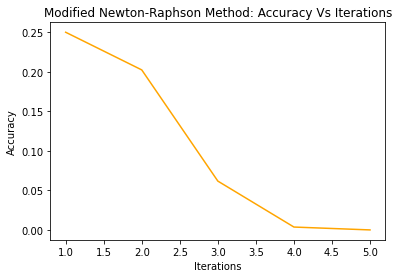

In [48]:
mn_acc = modifiedNewtonRaphson(f,f1,f2,x0,e)
mn_i = []
mn_a = []
for i in mn_acc:
    mn_i.append(i[0])
    mn_a.append(i[1])
plt.title("Modified Newton-Raphson Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(mn_i,mn_a,color = 'orange')
plt.show()

## Muller's Method



*** MULLER METHOD IMPLEMENTATION ***

Iteration =   3      p = 0.516526325667187          f(p) = 0.003741111456899 
a = -2.568846751343045                b = -5.746826273933951              c = -2.177979522590905


Iteration =   4      p = 0.517753732665951          f(p) = 0.000011045967808 
a = -3.037068420818029                b = -3.044251851445347              c = 0.003741111456899

Required Root: x = 0.517757


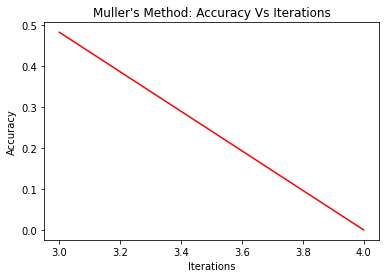

In [49]:
m_acc = Muller(f,x0,x1,x2,e)
m_i = []
m_a = []
for i in m_acc:
    m_i.append(i[0])
    m_a.append(i[1])
plt.title("Muller's Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(m_i,m_a,color = 'red')
plt.show()

## Combined Plot

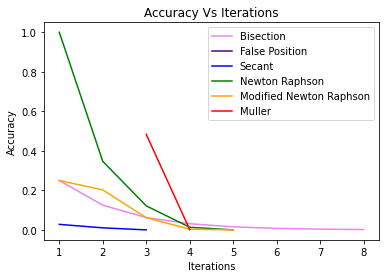

In [51]:

plt.title("Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.plot(b_i,b_a,color = 'violet')              # Bisection

plt.plot(f_i,f_a,color = 'indigo')              # False Position

plt.plot(s_i,s_a,color = 'blue')                # Secant

plt.plot(n_i,n_a,color = 'green')               # Newton Raphson

# plt.plot(fx_i,fx_a,color = 'yellow')            # Fixed Point Iterations

plt.plot(mn_i,mn_a,color = 'orange')            # Modified Newton Raphson

plt.plot(m_i,m_a,color = 'red')                 # Muller's Method

# plt.legend(["Bisection", "False Position", "Secant", "Newton Raphson", "Fixed Point", "Modified Newton Raphson", "Muller"], loc="upper right")

plt.legend(["Bisection", "False Position", "Secant", "Newton Raphson", "Modified Newton Raphson", "Muller"], loc="upper right")
plt.show()